In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Memuat data yang sudah diproses
processed_data = pd.read_pickle('../data/processed_data.pkl')  # Membaca file pickle berisi data yang sudah di-preprocessing
X_train = processed_data['X_train']  # Data fitur untuk pelatihan
X_test = processed_data['X_test']  # Data fitur untuk pengujian
y_train = processed_data['y_train']  # Target label untuk pelatihan
y_test = processed_data['y_test']  # Target label untuk pengujian

# ====================
# 1. Decision Tree Classifier
# ====================
print("=== Decision Tree Classifier ===")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

# ====================
# 2. Random Forest Classifier
# ====================
print("\n=== Random Forest Classifier ===")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# ====================
# 3. Logistic Regression
# ====================
# print("\n=== Logistic Regression ===")
# lr_model = LogisticRegression(random_state=42, max_iter=200)
# lr_model.fit(X_train, y_train)
# lr_pred = lr_model.predict(X_test)
# print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
# print(classification_report(y_test, lr_pred))

# ====================
# 4. Gradient Boosting
# ====================
print("\n=== Gradient Boosting ===")
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print(classification_report(y_test, gb_pred))

# ====================
# 5. Hyperparameter Tuning (Random Forest)
# ====================
print("\n=== Hyperparameter Tuning with GridSearchCV (Random Forest) ===")
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)
print("Best Model Accuracy:", accuracy_score(y_test, best_model.predict(X_test)))

# ====================
# Menyimpan Model Terbaik
# ====================
joblib.dump(best_model, '../models/best_stroke_model.pkl')
print("\nModel terbaik telah disimpan sebagai '../models/best_stroke_model.pkl'")


=== Decision Tree Classifier ===
Decision Tree Accuracy: 0.9185336048879837
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       929
           1       0.19      0.15      0.17        53

    accuracy                           0.92       982
   macro avg       0.57      0.56      0.56       982
weighted avg       0.91      0.92      0.91       982


=== Random Forest Classifier ===
Random Forest Accuracy: 0.945010183299389
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982


=== Logistic Regression ===


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

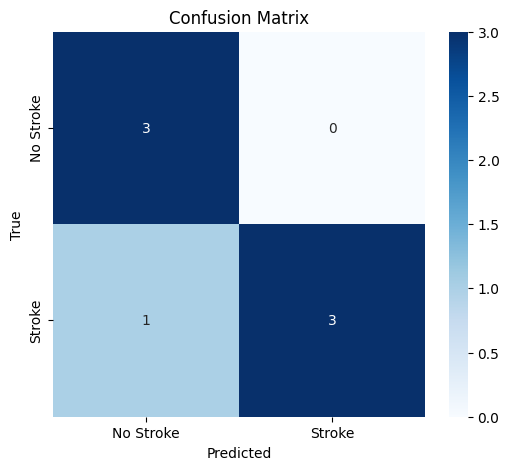

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Misal, y_test adalah label yang benar dan y_pred adalah prediksi model
y_test = [0, 1, 0, 1, 1, 0, 1]  # Contoh data
y_pred = [0, 1, 0, 0, 1, 0, 1]  # Contoh prediksi model

cm = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Contoh data
data = {'Age': [23, 45, 34, 50, 40],
        'BMI': [22.0, 28.5, 25.0, 30.0, 27.5]}

df = pd.DataFrame(data)

# Scaling data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Membuat dataframe baru untuk menampilkan data sebelum dan sesudah scaling
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

# Menampilkan perbandingan
df_combined = pd.concat([df, scaled_df], axis=1)
df_combined.columns = ['Age', 'BMI', 'Scaled_Age', 'Scaled_BMI']
print(df_combined)


   Age   BMI  Scaled_Age  Scaled_BMI
0   23  22.0   -1.646894   -1.632479
1   45  28.5    0.705812    0.674285
2   34  25.0   -0.470541   -0.567819
3   50  30.0    1.240518    1.206615
4   40  27.5    0.171106    0.319398
